https://github.com/lyuwenyu/RT-DETR/tree/main/rtdetr_pytorch

In [ ]:
!pip install ultralytics

In [2]:
from ultralytics import RTDETR
import locale
locale.getpreferredencoding = lambda: "UTF-8"

import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounted at /content/drive


In [ ]:
#training stuff
#model = RTDETR("rtdetr-l.pt")
model = RTDETR('/content/runs/detect/train4/weights/best.pt')
results = model.train(data='', epochs=100, imgsz=256, batch=16)

In [ ]:
model = RTDETR("/content/runs/detect/train5/weights/best.pt")
test_results = model.predict('')

In [29]:
def visualize_results(test_results, result_show_limit=20):

  grid_imgs = []
  for i, result in enumerate(test_results):
      if i >= result_show_limit:
          break
      img = result.plot()
      grid_imgs.append(img)

  cols = 4
  #need to round up a lil for extra images
  rows = int(np.ceil(len(grid_imgs) / cols))

  fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

  for idx, ax in enumerate(axs.flat):
      if idx < len(grid_imgs):
          ax.imshow(grid_imgs[idx])
          ax.set_title(f"Result {idx+1}")
      ax.axis('off')

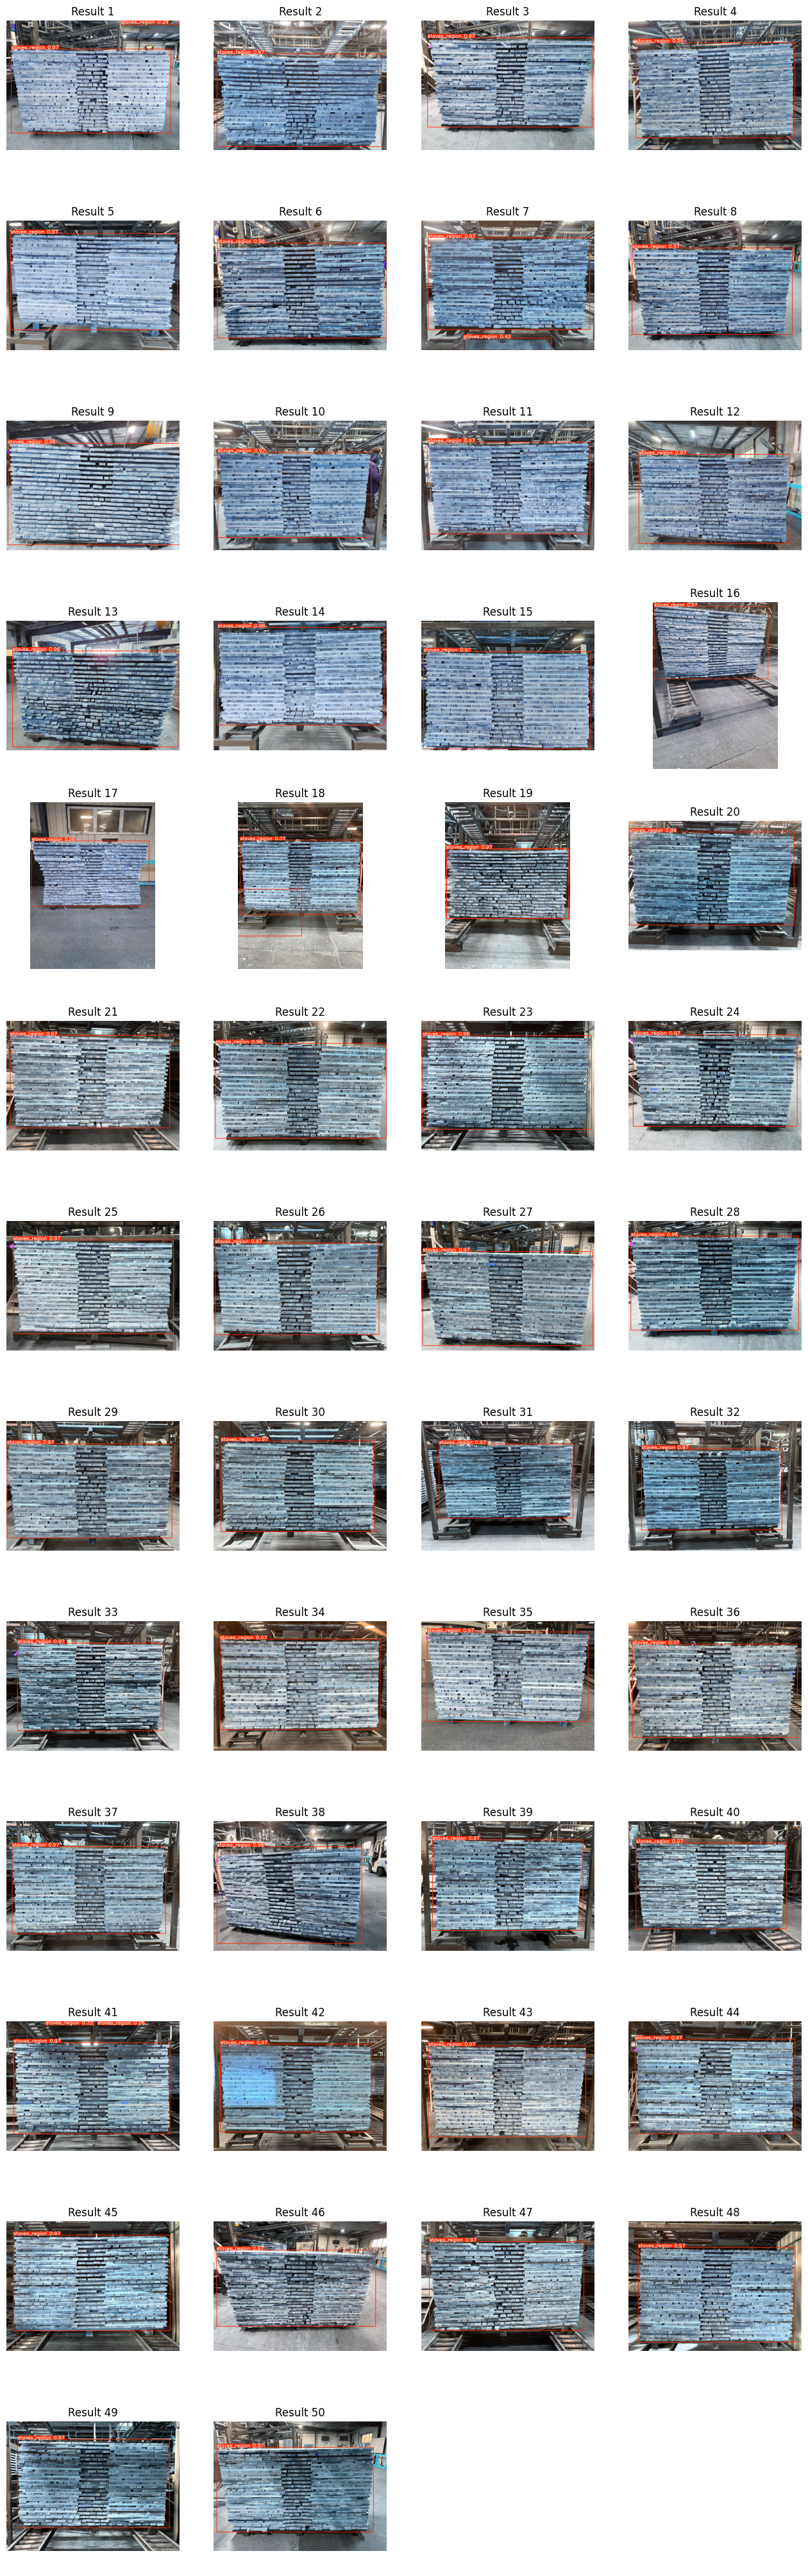

In [30]:
visualize_results(test_results, result_show_limit=50)